# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating Fake Data

### Employee Dataset

In [44]:
## state

import random
from random import choices

east_states_list = ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']
print(len(east_states_list))

east_states = choices(east_states_list, k=10000)
print('Length:', len(east_states))
print(set(east_states))
print(len(set(east_states)))

14
Length: 10000
{'Connecticut', 'Maine', 'Virginia', 'New Jersey', 'South Carolina', 'Massachusetts', 'Florida', 'Georgia', 'Delaware', 'North Carolina', 'Maryland', 'Rhode Island', 'New York', 'New Hampshire'}
14


In [45]:
for e in east_states_list:
    print(e, east_states.count(e))

Maine 666
New Hampshire 723
Massachusetts 755
Rhode Island 707
Connecticut 698
New York 673
New Jersey 759
Delaware 721
Maryland 700
Virginia 735
North Carolina 698
South Carolina 756
Georgia 711
Florida 698


In [55]:
## employee id

eid = random.sample(range(10001,99999),10000)
eid
print(len(set(eid)))
eid[:5]

10000


[38690, 22916, 31692, 58847, 30666]

In [104]:
# phone

ph = random.sample(range(10000001,99999999),10000)
ph
print(len(set(ph)))
ph[:5]

10000


[71957282, 14285155, 51955137, 25856254, 48393034]

In [58]:
!pip install Faker

In [97]:
# name

from faker.providers.person.en import Provider

fnames = list(set(Provider.first_names))

random.seed(44)
random.shuffle(fnames)

print(len(fnames))
print(fnames[:5])

fnames_2 = list(set(Provider.first_names))[:10000-6824]

random.seed(42)
random.shuffle(fnames_2)

print(len(fnames_2))
print(fnames_2[:5])

6824
['Konner', 'Lesly', 'Herman', 'Seward', 'Meghann']
3176
['Jerusha', 'Addison', 'Noreen', 'Grafton', 'Colby']


In [98]:
fnames.extend(fnames_2)
random.shuffle(fnames)

print(len(fnames))
print(fnames[:5])

10000
['Heidi', 'Alexus', 'Elsa', 'Celia', 'Marcelo']


In [103]:
# lastname

from faker.providers.person.en import Provider

lnames_list = list(Provider.last_names)

random.seed(44)
random.shuffle(lnames_list)

print(len(lnames_list))
print(fnames[:5])

lnames = lnames_list*30
lnames = lnames[:10000]
random.shuffle(lnames)
print(len(lnames))
lnames[:5]

473
['Heidi', 'Alexus', 'Elsa', 'Celia', 'Marcelo']
10000


['Tromp', "D'Amore", 'Halvorson', 'Berge', 'Torp']

In [ ]:
fnames.extend(fnames_2)
random.shuffle(fnames)

print(len(fnames))
print(fnames[:5])

In [108]:
for e in [eid, fnames, lnames, ph, east_states]:
    print('length:', len(e), 'unique:', len(set(e)))

length: 10000 unique: 10000
length: 10000 unique: 6824
length: 10000 unique: 473
length: 10000 unique: 10000
length: 10000 unique: 14


In [111]:
## Employee Dataframe

df_emp = pd.DataFrame({'employee id':eid, 'name':fnames, 'lastname':lnames, 'phone':ph, 'state':east_states})
df_emp.head()

,employee id,name,lastname,phone,state
0,38690,Heidi,Tromp,71957282,Rhode Island
1,22916,Alexus,D'Amore,14285155,New Hampshire
2,31692,Elsa,Halvorson,51955137,Maine
3,58847,Celia,Berge,25856254,Delaware
4,30666,Marcelo,Torp,48393034,Massachusetts


In [119]:
print(len(df_emp))
df_emp.isnull().sum()

10000


employee id    0
name           0
lastname       0
phone          0
state          0
dtype: int64

### Salary Dataset

In [122]:
## department ID

dept_id = [random.randint(1,7) for e in range(10000)]

print(len(dept_id))
dept_id[:5]

10000


[4, 2, 2, 1, 3]

In [121]:
## salary anually 

salary_list = [random.randint(50000,214000) for e in range(10000)]

print(len(salary_list))
salary_list[:5]

10000


[207836, 74110, 137541, 90443, 91140]

In [128]:
df_salary = pd.DataFrame({'employee id':eid, 'department id':dept_id, 'yearly salary':salary_list})
df_salary.head()

,employee id,department id,yearly salary
0,38690,4,207836
1,22916,2,74110
2,31692,2,137541
3,58847,1,90443
4,30666,3,91140


In [129]:
print(len(df_salary))
df_salary.isnull().sum()

10000


employee id      0
department id    0
yearly salary    0
dtype: int64

In [130]:
df_salary['department id'].unique()

array([4, 2, 1, 3, 5, 7, 6], dtype=int64)

### Department Dataset

In [133]:
df_dept = pd.DataFrame({'department id':list(range(1,8))})
df_dept

,department id
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [135]:
dept_dict = {1:'HR', 2:'IT', 3:'Finance', 4:'Procurement', 4:'Sales', 5:'Marketing', 6:'Admin', 7:'Services'}

df_dept['department name'] = df_dept['department id'].map(dept_dict)

In [136]:
df_dept

,department id,department name
0,1,HR
1,2,IT
2,3,Finance
3,4,Sales
4,5,Marketing
5,6,Admin
6,7,Services


## Questions

#### 1. Visualize the average salary of each department

In [138]:
df_salary.columns

Index(['employee id', 'department id', 'yearly salary'], dtype='object')

In [146]:
df_q1 = pd.merge(df_salary, df_dept, how='left', on='department id')
df_q1.head()

,employee id,department id,yearly salary,department name
0,38690,4,207836,Sales
1,22916,2,74110,IT
2,31692,2,137541,IT
3,58847,1,90443,HR
4,30666,3,91140,Finance


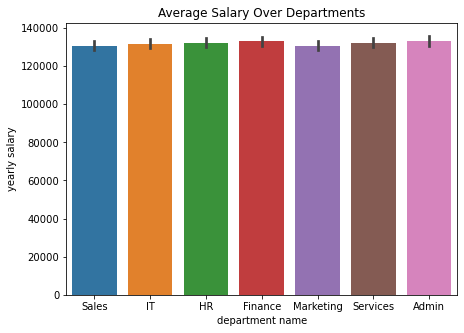

In [149]:
plt.figure(figsize=(7,5))

sns.barplot(data=df_q1, x='department name', y='yearly salary')
plt.title('Average Salary Over Departments')
plt.show()

In [ ]:
## We can see almost similar salaries for all departments, with department admin having slightly higher salary
## compared to other departments and department Sales having slightly lower salary compared to other departments

#### 2. Visualize the total number of employees living in each state for each department

In [153]:
df_emp.columns

Index(['employee id', 'name', 'lastname', 'phone', 'state'], dtype='object')

In [152]:
df_q21 = pd.merge(df_salary, df_dept, how='left', on='department id')
df_q21.head()

,employee id,department id,yearly salary,department name
0,38690,4,207836,Sales
1,22916,2,74110,IT
2,31692,2,137541,IT
3,58847,1,90443,HR
4,30666,3,91140,Finance


In [154]:
df_q2 = pd.merge(df_q21, df_emp[['employee id', 'state']], how='left', on='employee id')
df_q2.head()

,employee id,department id,yearly salary,department name,state
0,38690,4,207836,Sales,Rhode Island
1,22916,2,74110,IT,New Hampshire
2,31692,2,137541,IT,Maine
3,58847,1,90443,HR,Delaware
4,30666,3,91140,Finance,Massachusetts


In [182]:
df_q2['state'].unique()

array(['Rhode Island', 'New Hampshire', 'Maine', 'Delaware',
       'Massachusetts', 'North Carolina', 'New Jersey', 'Florida',
       'Virginia', 'Connecticut', 'New York', 'Maryland',
       'South Carolina', 'Georgia'], dtype=object)

In [212]:
data=df_q2[(df_q2['state'] == 'Rhode Island') | (df_q2['state'] == 'New Hampshire') | 
                       (df_q2['state'] == 'Maine') |(df_q2['state'] == 'Delaware') | 
                       (df_q2['state'] == 'Massachusetts')].groupby(['state','department id']).count()
data.loc['Delaware':'Maine']

employee id  yearly salary  department name
state    department id                                             
Delaware 1                      106            106              106
         2                      107            107              107
         3                      115            115              115
         4                      100            100              100
         5                       98             98               98
         6                       93             93               93
         7                      102            102              102
Maine    1                       92             92               92
         2                       94             94               94
         3                       81             81               81
         4                       98             98               98
         5                       89             89               89
         6                       99             99               99
         7                      113            113              113

<Figure size 504x720 with 0 Axes>

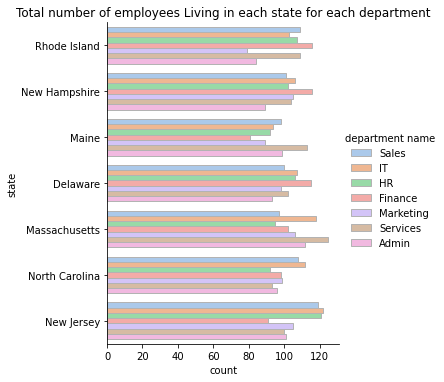

In [219]:
plt.figure(figsize=(7,10))

sns.catplot(y='state', hue='department name', kind='count', edgecolor='0.7',
            palette='pastel',
            data=df_q2[(df_q2['state'] == 'Rhode Island') | (df_q2['state'] == 'New Hampshire') | 
                       (df_q2['state'] == 'Maine') |(df_q2['state'] == 'Delaware') | 
                       (df_q2['state'] == 'Massachusetts') | (df_q2['state'] == 'North Carolina') | 
                       (df_q2['state'] == 'New Jersey')])
plt.title('Total number of employees Living in each state for each department')

plt.show()

<Figure size 504x720 with 0 Axes>

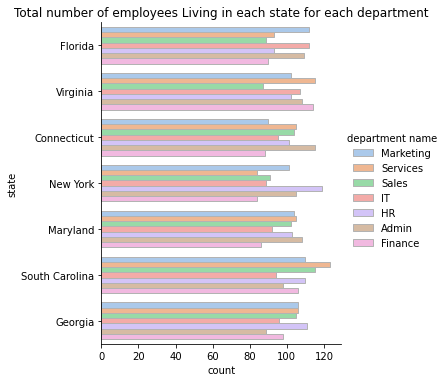

In [221]:
plt.figure(figsize=(7,10))

sns.catplot(y='state', hue='department name', kind='count', edgecolor='0.7',
            palette='pastel',
            data=df_q2[(df_q2['state'] == 'Florida') |
                (df_q2['state'] == 'Virginia') | (df_q2['state'] == 'Connecticut') | 
                       (df_q2['state'] == 'New York') | (df_q2['state'] == 'Maryland') | 
                       (df_q2['state'] == 'South Carolina') |
      (df_q2['state'] == 'Georgia')])
plt.title('Total number of employees Living in each state for each department')

plt.show()

#### 3. Visualize salary distribution of different states

In [225]:
df_q3 = pd.merge(df_emp, df_salary, how='left', on='employee id')
df_q3.head()

,employee id,name,lastname,phone,state,department id,yearly salary
0,38690,Heidi,Tromp,71957282,Rhode Island,4,207836
1,22916,Alexus,D'Amore,14285155,New Hampshire,2,74110
2,31692,Elsa,Halvorson,51955137,Maine,2,137541
3,58847,Celia,Berge,25856254,Delaware,1,90443
4,30666,Marcelo,Torp,48393034,Massachusetts,3,91140


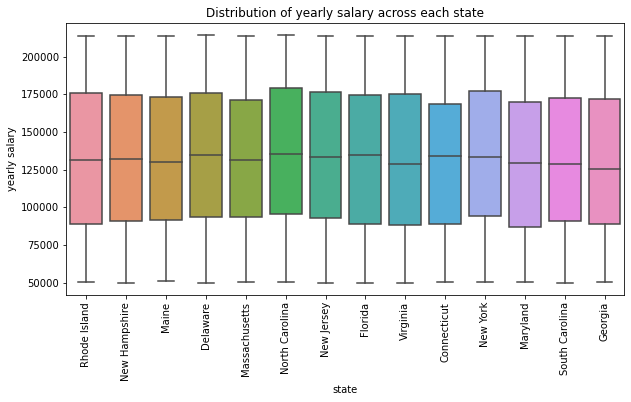

In [232]:
plt.figure(figsize=(10,5))

sns.boxplot(x='state', y='yearly salary',data=df_q3)

plt.title('Distribution of yearly salary across each state')
plt.xticks(rotation=90)

plt.show()

#### 4. Visualize salary distribution of different departments

In [233]:
df_q41 = pd.merge(df_emp, df_salary, how='left', on='employee id')

df_q4 = pd.merge(df_q41, df_dept, how='left', on='department id')
df_q4.head()

,employee id,name,lastname,phone,state,department id,yearly salary,department name
0,38690,Heidi,Tromp,71957282,Rhode Island,4,207836,Sales
1,22916,Alexus,D'Amore,14285155,New Hampshire,2,74110,IT
2,31692,Elsa,Halvorson,51955137,Maine,2,137541,IT
3,58847,Celia,Berge,25856254,Delaware,1,90443,HR
4,30666,Marcelo,Torp,48393034,Massachusetts,3,91140,Finance


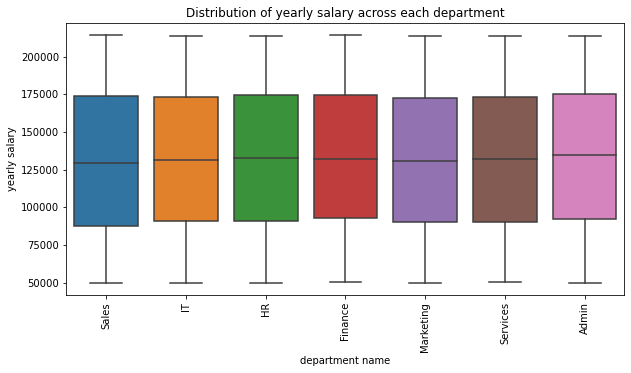

In [235]:
plt.figure(figsize=(10,5))

sns.boxplot(x='department name', y='yearly salary',data=df_q4)

plt.title('Distribution of yearly salary across each department')
plt.xticks(rotation=90)

plt.show()

### Salary distribution as normal distribution

<AxesSubplot:xlabel='yearly salary', ylabel='Density'>

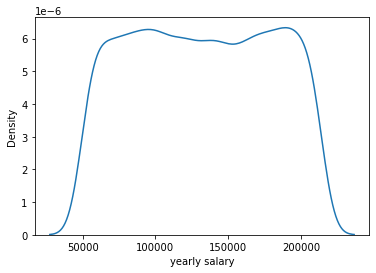

In [237]:
sns.kdeplot(df_salary['yearly salary'])

In [ ]:
## We can see a fair bell curve, hence our yearly salary is normally distributed 